# 🧠 Smoking Status Prediction from Bio-Signals

## 📌 Introduction

In this project, we aim to predict an individual's smoking status based on various biometric signals and medical test results. The dataset used for this task was synthetically generated using a deep learning model trained on the original *Smoker Status Prediction using Bio-Signals* dataset. While the feature distributions closely resemble those of the original dataset, slight variations exist due to the generation process.

The primary goal of this notebook is to build a machine learning model that can accurately classify individuals as smokers or non-smokers based on their health profile. This involves understanding the dataset, performing exploratory data analysis (EDA), preprocessing the data, building and evaluating classification models, and optionally comparing results when incorporating the original dataset.

## 🎯 Objective

- Predict the `smoking` status (0: non-smoker, 1: smoker) using 23 biomedical features.
- Explore data patterns and correlations that may indicate smoking behavior.
- Evaluate multiple models and determine the most effective approach for classification.
- Experiment with incorporating the original dataset to enhance performance.

## 🧾 Dataset Overview

The dataset includes the following types of features:
- **Demographic Data** (e.g., age, height, weight)
- **Vision & Hearing Tests**
- **Blood Pressure & Blood Tests**
- **Liver & Kidney Function Indicators**
- **Urine & Dental Health Markers**

With this notebook, we aim not only to achieve high classification performance but also to gain meaningful insights from health data that could contribute to public health research.

---


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)



In [52]:
df = pd.read_csv('train.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [53]:
X = df.drop('smoking', axis=1)
y = df['smoking']

In [54]:
print("Features Info:")
print("-" * 50)
X.info()

Features Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HD

In [55]:
X.drop(columns= ['id'] , inplace= True)

In [56]:
print("\nDataset Shape:", df.shape)
print("\nMissing Values:")
print(X.isnull().sum())


Dataset Shape: (159256, 24)

Missing Values:
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64


In [57]:
X.drop_duplicates(inplace=True)
print(f"\nShape after removing duplicates: {df.shape}")



Shape after removing duplicates: (159256, 24)


In [58]:
print("Statistical Summary of Numerical Columns:")
print("-" * 50)
print(X.describe())


Statistical Summary of Numerical Columns:
--------------------------------------------------
                 age     height(cm)     weight(kg)      waist(cm)  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean       44.306626     165.266929      67.143662      83.001990   
std        11.842286       8.818970      12.586198       8.957937   
min        20.000000     135.000000      30.000000      51.000000   
25%        40.000000     160.000000      60.000000      77.000000   
50%        40.000000     165.000000      65.000000      83.000000   
75%        55.000000     170.000000      75.000000      89.000000   
max        85.000000     190.000000     130.000000     127.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count   159256.000000    159256.000000  159256.000000   159256.000000   
mean         1.005798         1.000989       1.023974        1.023421   
std          0.402113         0.392299       0.152969        0.151

In [59]:
X.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [60]:
continuous_cols = [
    'height(cm)', 'weight(kg)', 'waist(cm)',
    'eyesight(left)', 'eyesight(right)',
    'systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]


In [61]:
categorical_cols = [
    'age', 'hearing(left)', 'hearing(right)',
    'Urine protein', 'dental caries'
]


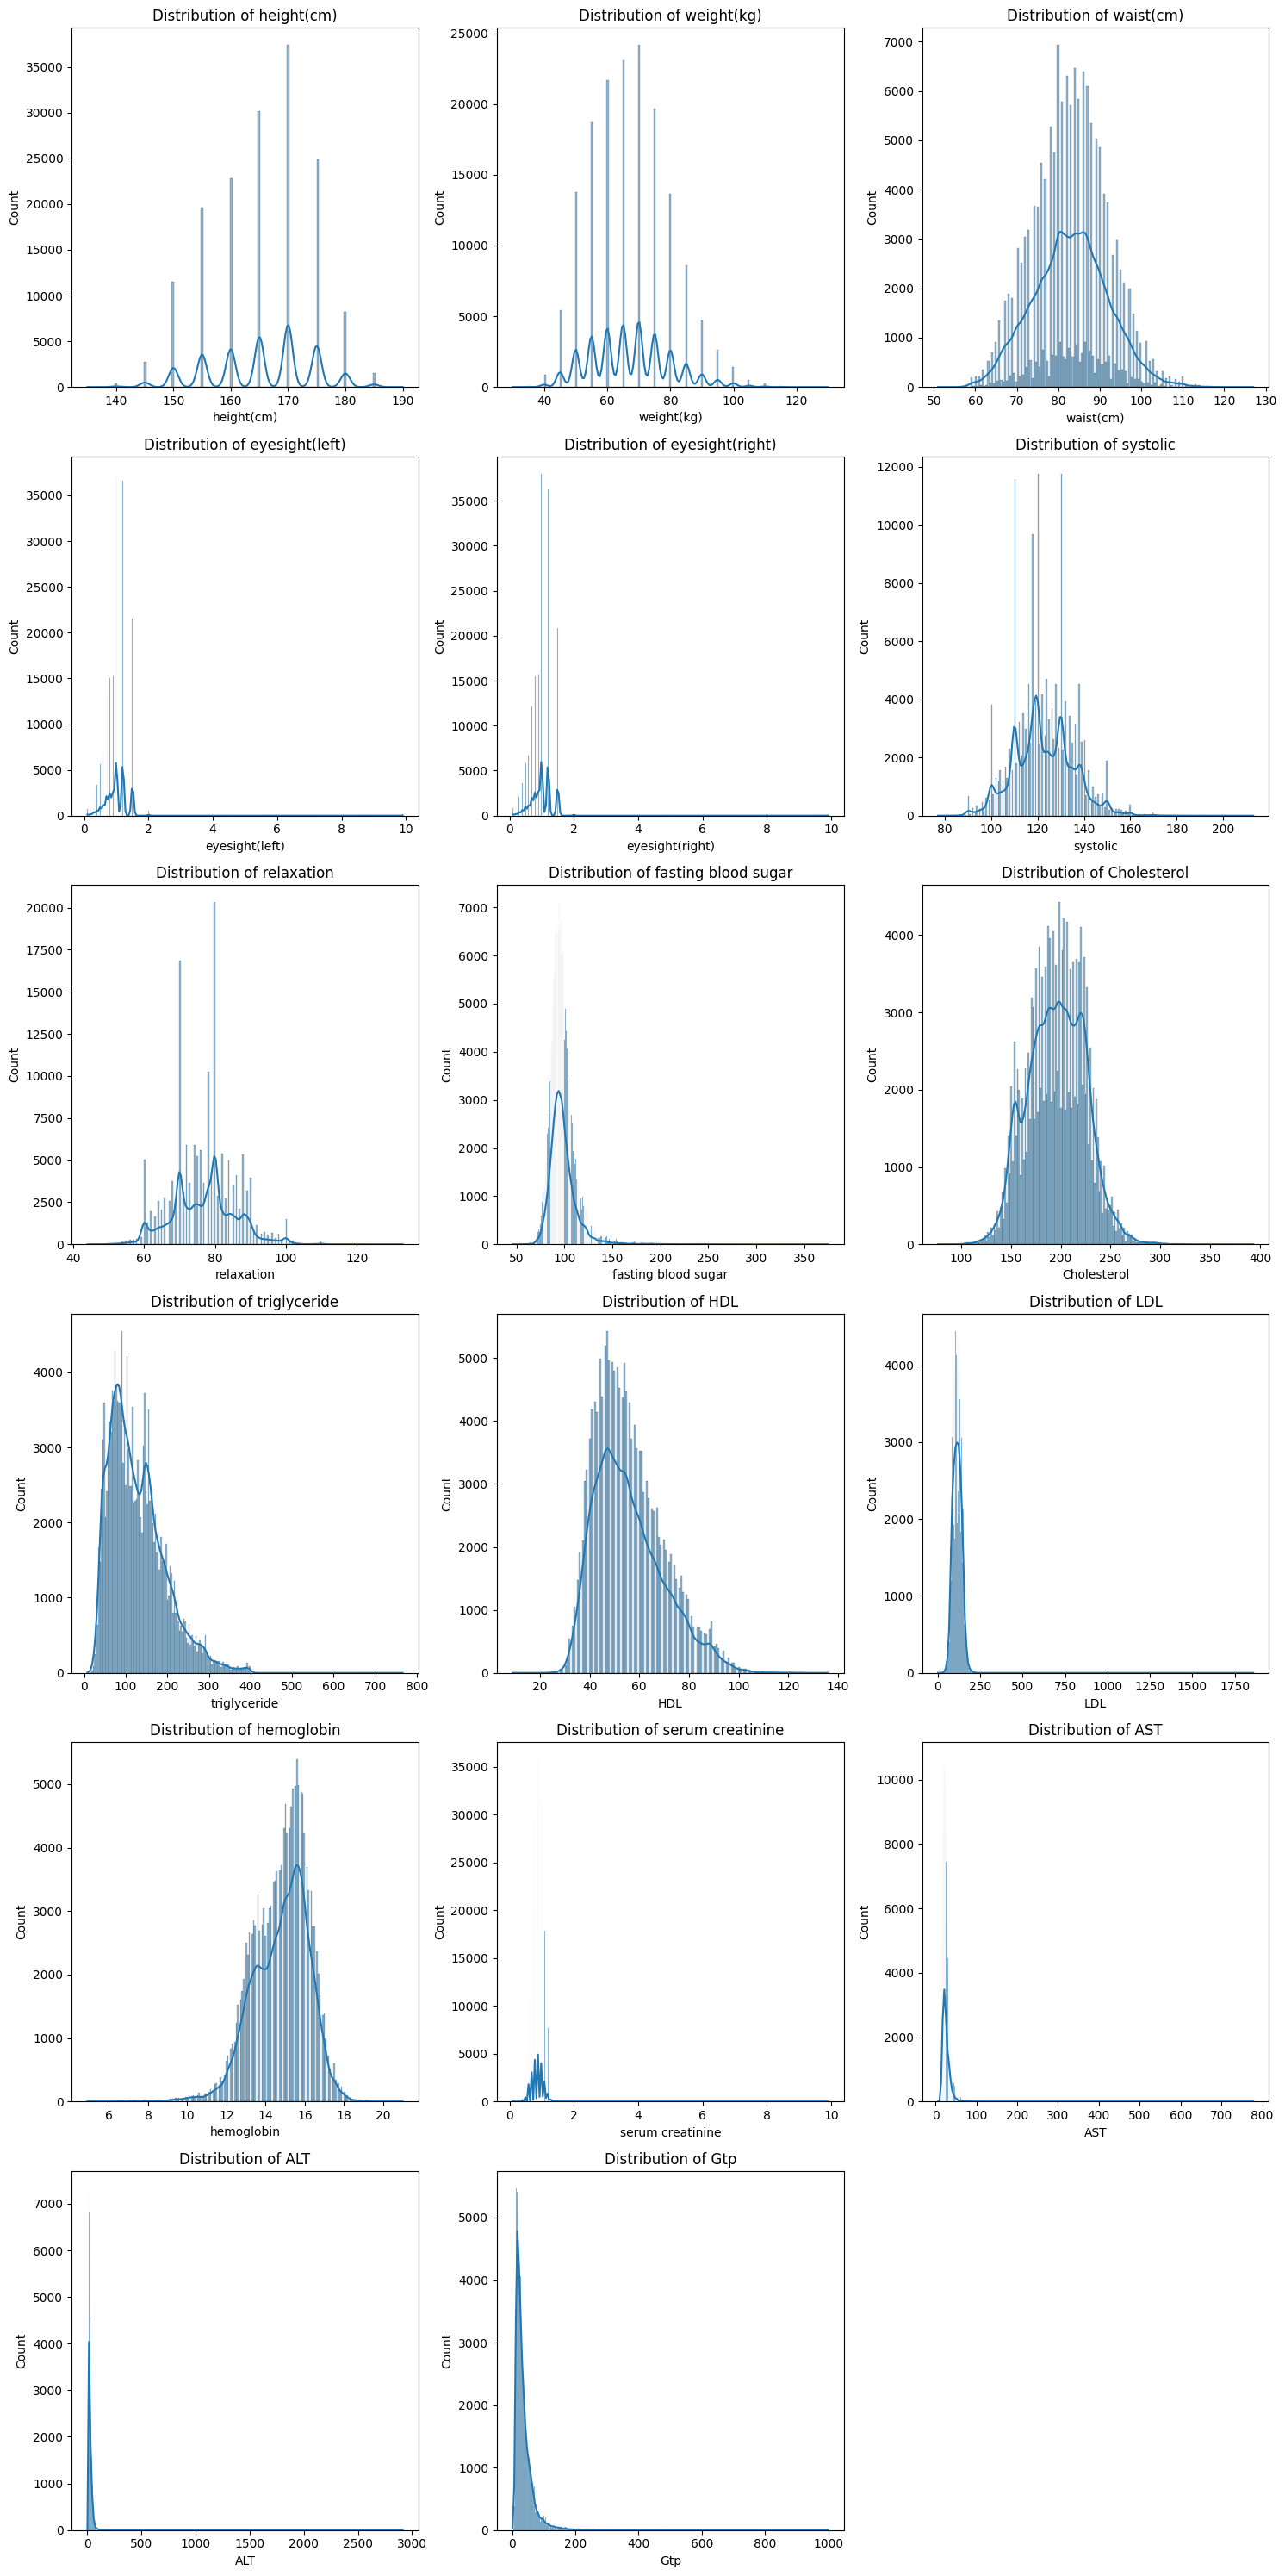

In [62]:
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=X, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

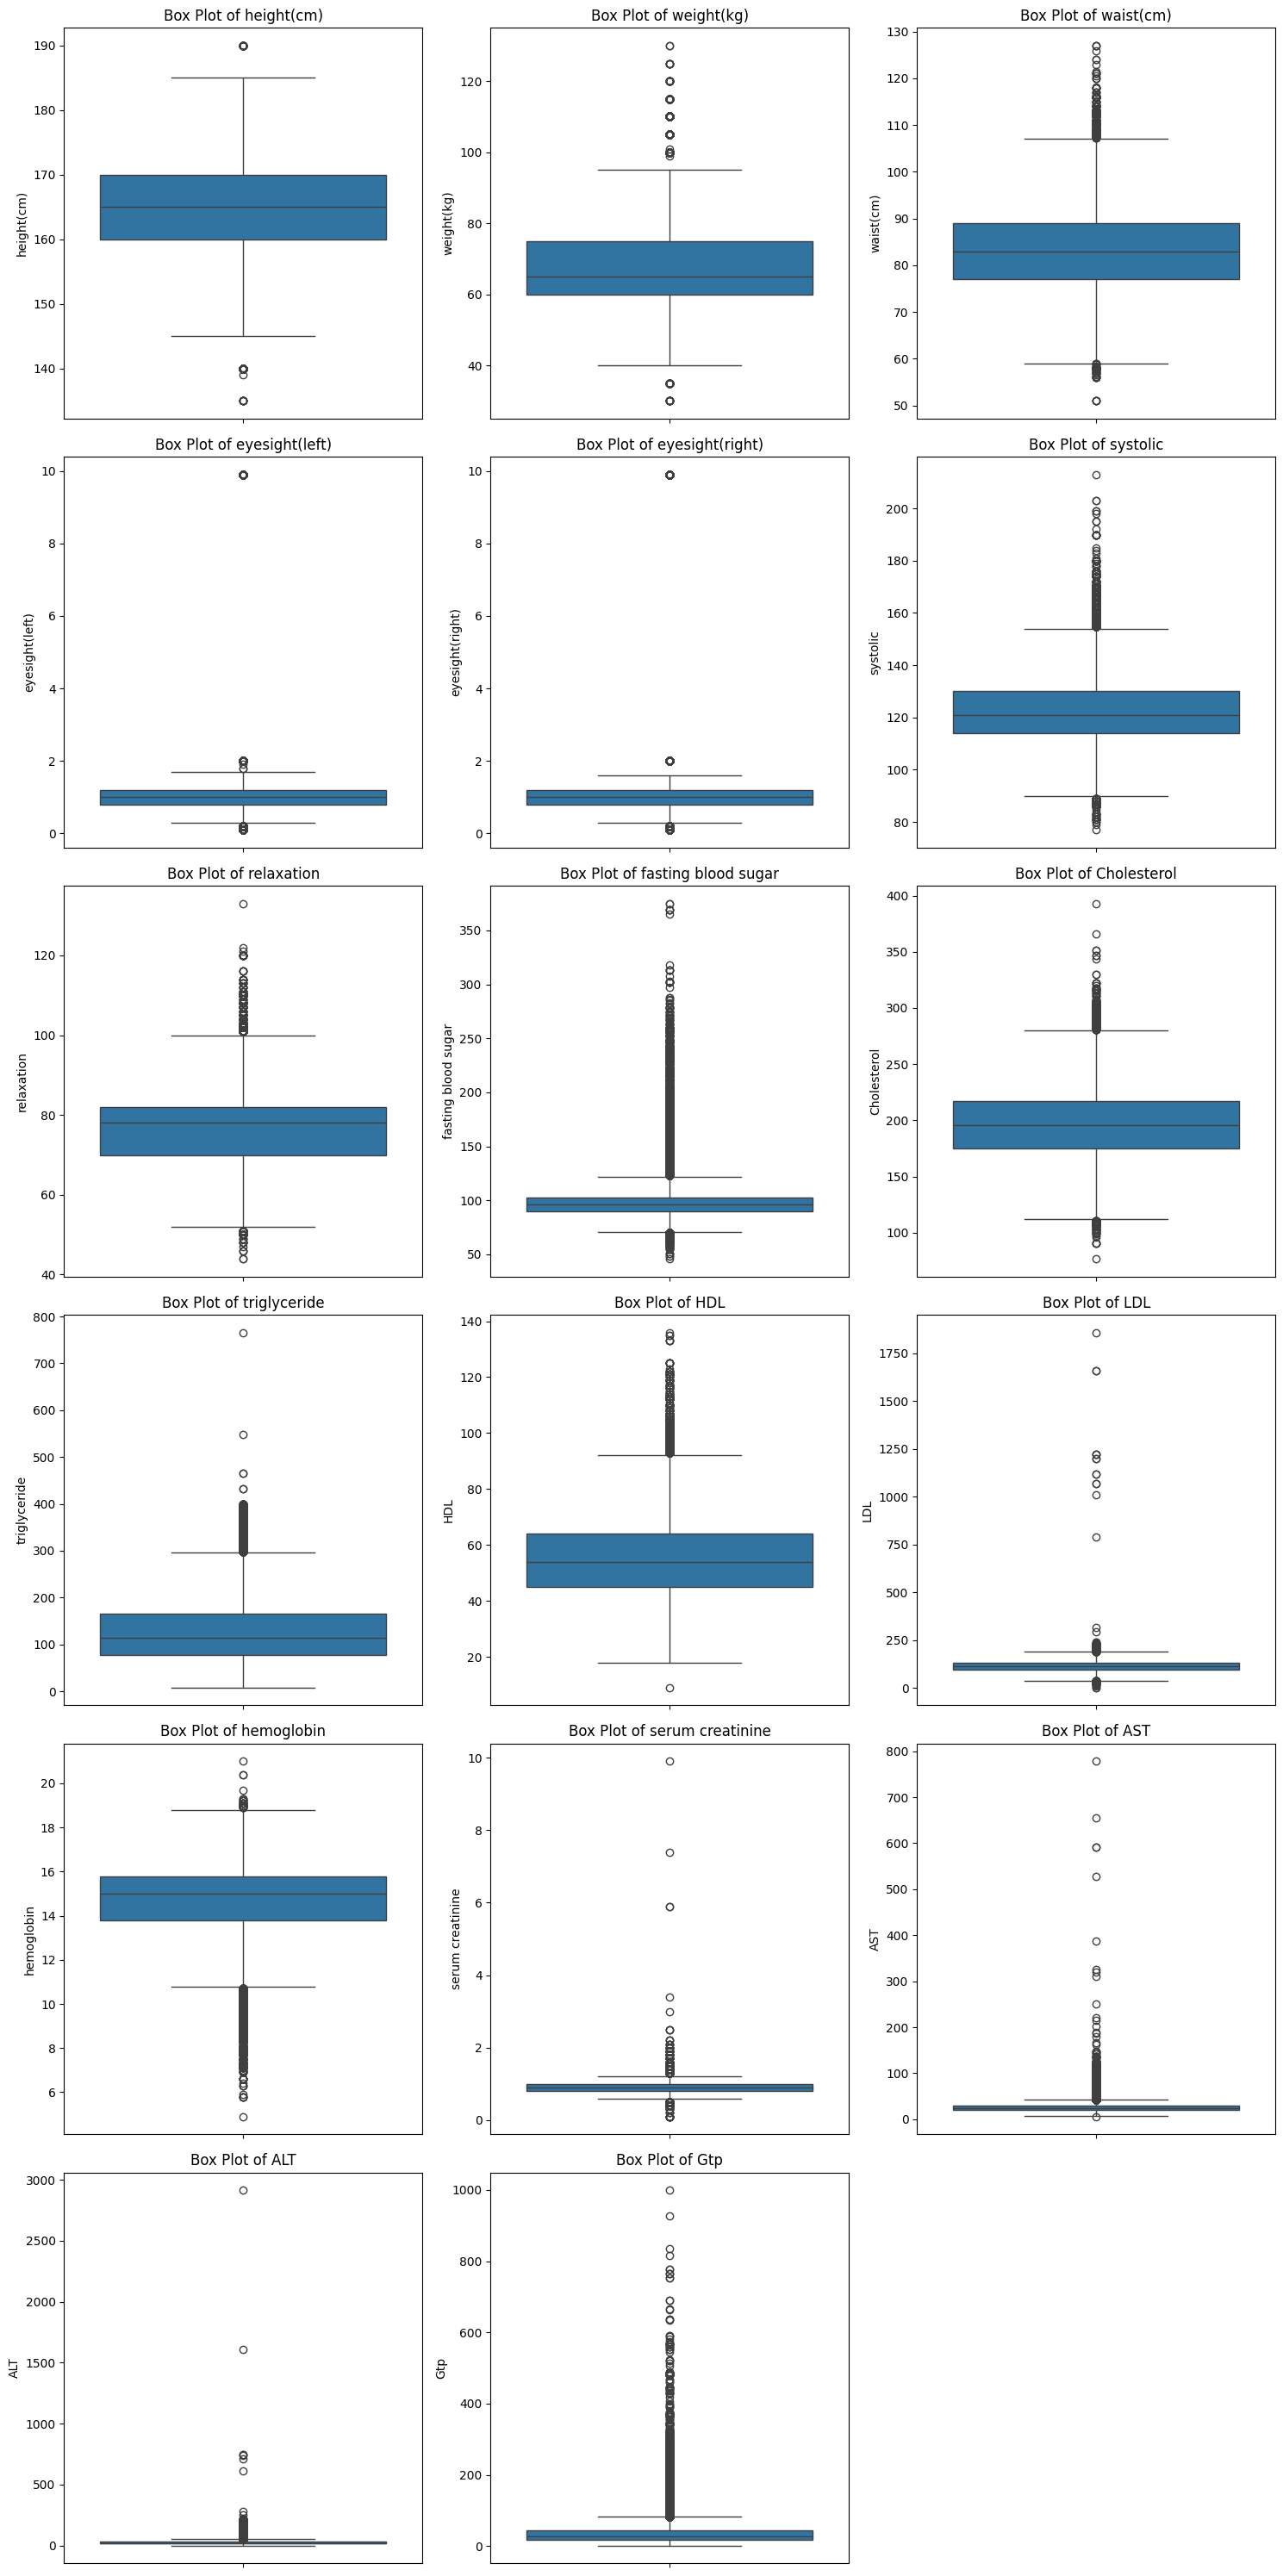

In [63]:
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [64]:
# Make a copy of the DataFrame
X_cleaned = X.copy()

# Calculate Q1, Q3, and IQR
Q1 = X_cleaned[continuous_cols].quantile(0.25)
Q3 = X_cleaned[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for rows **without** any outlier
mask = ~((X_cleaned[continuous_cols] < (Q1 - 1.5 * IQR)) | 
         (X_cleaned[continuous_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to drop rows with any outlier in continuous columns
X_cleaned = X_cleaned[mask]


In [65]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118258 entries, 2 to 159255
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  118258 non-null  int64  
 1   height(cm)           118258 non-null  int64  
 2   weight(kg)           118258 non-null  int64  
 3   waist(cm)            118258 non-null  float64
 4   eyesight(left)       118258 non-null  float64
 5   eyesight(right)      118258 non-null  float64
 6   hearing(left)        118258 non-null  int64  
 7   hearing(right)       118258 non-null  int64  
 8   systolic             118258 non-null  int64  
 9   relaxation           118258 non-null  int64  
 10  fasting blood sugar  118258 non-null  int64  
 11  Cholesterol          118258 non-null  int64  
 12  triglyceride         118258 non-null  int64  
 13  HDL                  118258 non-null  int64  
 14  LDL                  118258 non-null  int64  
 15  hemoglobin           1

In [66]:
from scipy.stats import skew

# Compute skewness for each continuous feature before dealing with outliers
before_skew = X[continuous_cols].apply(lambda x: skew(x, nan_policy='omit'))
print("Skewness Before Handling Outliers:")
print(before_skew)

Skewness Before Handling Outliers:
height(cm)             -0.269912
weight(kg)              0.378071
waist(cm)               0.072445
eyesight(left)          8.890489
eyesight(right)         8.486769
systolic                0.219923
relaxation              0.176348
fasting blood sugar     3.461066
Cholesterol             0.043487
triglyceride            0.986218
HDL                     0.758877
LDL                     6.874745
hemoglobin             -0.633565
serum creatinine        1.511045
AST                    11.592237
ALT                    34.829684
Gtp                     5.414776
dtype: float64


In [67]:
# Compute skewness for each continuous feature after dealing with outliers
after_skew = X_cleaned[continuous_cols].apply(lambda x: skew(x, nan_policy='omit'))
print("Skewness After Handling Outliers:")
print(after_skew)

Skewness After Handling Outliers:
height(cm)            -0.229403
weight(kg)             0.199892
waist(cm)             -0.044572
eyesight(left)        -0.070657
eyesight(right)       -0.070924
systolic               0.059625
relaxation             0.083040
fasting blood sugar    0.339178
Cholesterol           -0.045104
triglyceride           0.643649
HDL                    0.562257
LDL                    0.064167
hemoglobin            -0.304355
serum creatinine      -0.011596
AST                    0.688389
ALT                    0.961056
Gtp                    1.077127
dtype: float64


## Feature Engineering

In [68]:
print(sorted(X['height(cm)'].unique()))
print(sorted(X['weight(kg)'].unique()))
print(sorted(X['age'].unique()))


[135, 139, 140, 145, 150, 155, 160, 165, 170, 175, 180, 181, 185, 190]
[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 79, 80, 82, 83, 85, 88, 89, 90, 95, 99, 100, 101, 105, 110, 115, 120, 125, 130]
[20, 25, 30, 35, 40, 45, 49, 50, 55, 58, 60, 62, 65, 69, 70, 75, 80, 85]


In [69]:
X_cleaned['BMI'] = X_cleaned['weight(kg)'] / (X_cleaned['height(cm)'] / 100) ** 2


In [70]:
X_cleaned['LDL_to_HDL'] = X_cleaned['LDL'] / X_cleaned['HDL']
X_cleaned['triglyceride_to_HDL'] = X_cleaned['triglyceride'] / X_cleaned['HDL']


In [71]:
# 1. Non-HDL Cholesterol (total cholesterol minus HDL)
X_cleaned['non_HDL_chol'] = X_cleaned['Cholesterol'] - X_cleaned['HDL']

# 2. AST/ALT Ratio (liver function indicator)
X_cleaned['AST_ALT_ratio'] = X_cleaned['AST'] / X_cleaned['ALT']


In [83]:
# Multiply 'age' and 'Gtp' element-wise
X_cleaned['age_Gtp'] = X_cleaned['age'] * X_cleaned['Gtp']

C:\Users\DELL\AppData\Local\Temp\ipykernel_27188\3612100692.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age', y='smoking', data=df, ci=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_27188\3612100692.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='weight(kg)', y='smoking', data=df, ci=None)
C:\Users\DELL\AppData\Local\Temp\ipykernel_27188\3612100692.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='height(cm)', y='smoking', data=df, ci=None)


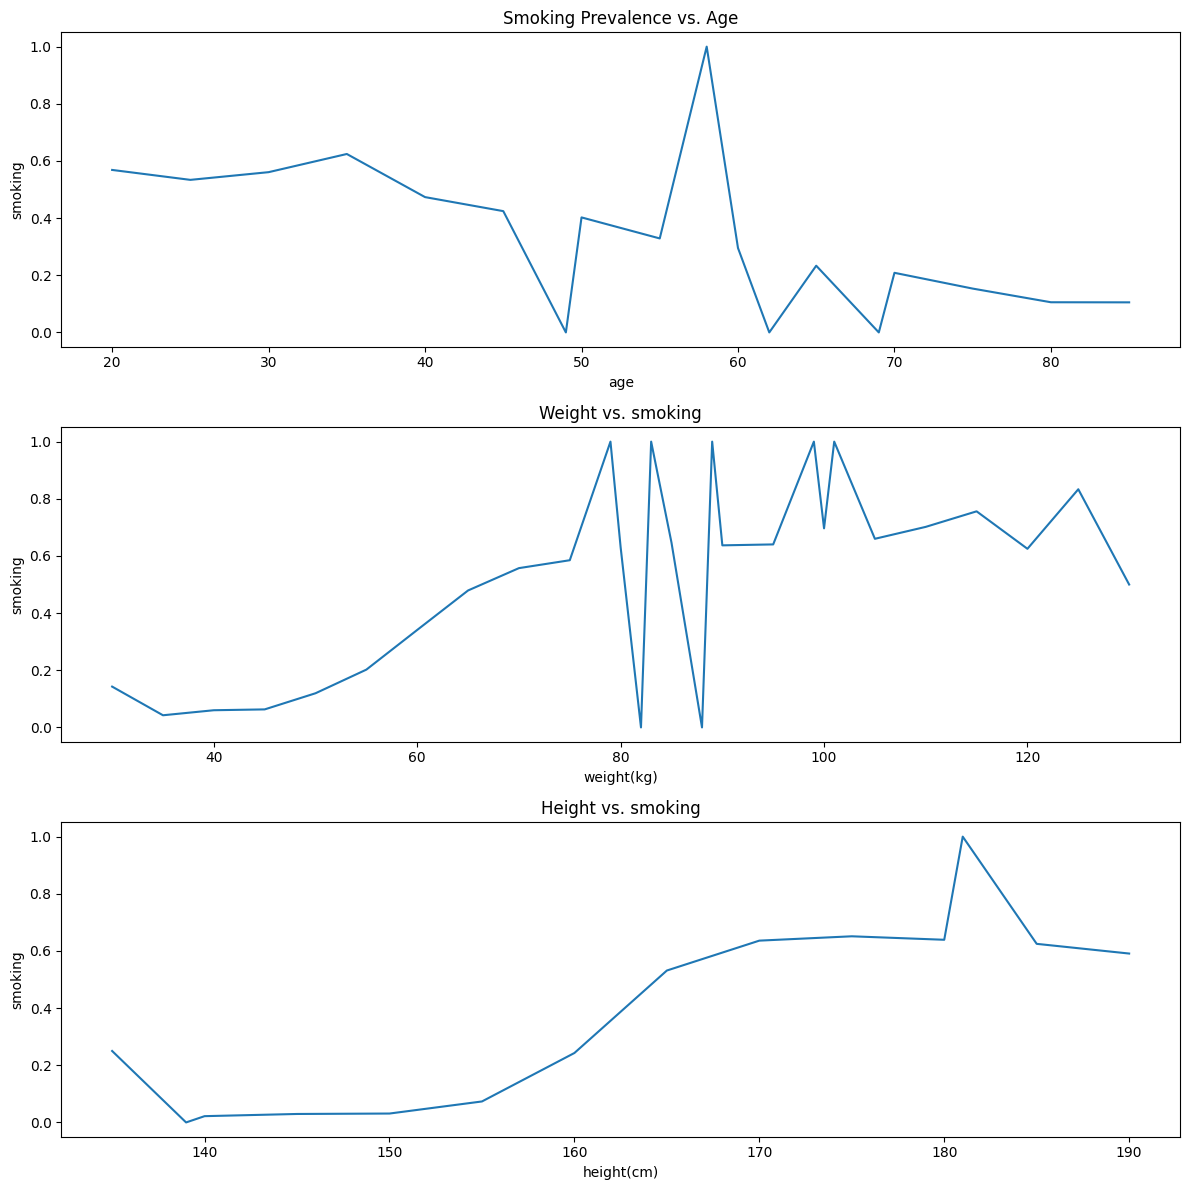

In [73]:
plt.figure(figsize=(12, 12))

# Plot 1: Age vs Smoking
plt.subplot(3, 1, 1)
sns.lineplot(x='age', y='smoking', data=df, ci=None)
plt.title("Smoking Prevalence vs. Age")

# Plot 2: Age vs Weight
plt.subplot(3, 1, 2)
sns.lineplot(x='weight(kg)', y='smoking', data=df, ci=None)
plt.title("Weight vs. smoking")

# Plot 3: Age vs Height
plt.subplot(3, 1, 3)
sns.lineplot(x='height(cm)', y='smoking', data=df, ci=None)
plt.title("Height vs. smoking")

plt.tight_layout()
plt.show()


In [74]:
# bins = [130, 150, 160, 170, 180, 200]
# labels = ['Short', 'Below Average', 'Average', 'Tall', 'Very Tall']
# X['height_cat'] = pd.cut(X['height(cm)'], bins=bins, labels=labels)


# bins = [0, 50, 70, 90, 110, 150]
# labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Very Obese']
# X['weight_cat'] = pd.cut(X['weight(kg)'], bins=bins, labels=labels)


# bins = [0, 30, 45, 60, 75, 100]
# labels = ['<30', '30-44', '45-59', '60-74', '75+']
# X['age_group'] = pd.cut(X['age'], bins=bins, labels=labels)


In [84]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118258 entries, 2 to 159255
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  118258 non-null  int64  
 1   height(cm)           118258 non-null  int64  
 2   weight(kg)           118258 non-null  int64  
 3   waist(cm)            118258 non-null  float64
 4   eyesight(left)       118258 non-null  float64
 5   eyesight(right)      118258 non-null  float64
 6   hearing(left)        118258 non-null  int64  
 7   hearing(right)       118258 non-null  int64  
 8   systolic             118258 non-null  int64  
 9   relaxation           118258 non-null  int64  
 10  fasting blood sugar  118258 non-null  int64  
 11  Cholesterol          118258 non-null  int64  
 12  triglyceride         118258 non-null  int64  
 13  HDL                  118258 non-null  int64  
 14  LDL                  118258 non-null  int64  
 15  hemoglobin           1

In [76]:
# X.drop(columns= ['height(cm)' , 'weight(kg)' , 'age'  ] , inplace = True)

In [85]:
continuous_features = [
    'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
    'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
    'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'BMI',
    'LDL_to_HDL', 'triglyceride_to_HDL', 'non_HDL_chol', 'AST_ALT_ratio',
     'age_Gtp'
]




categorical_features = [
    'age',  # can be considered categorical due to only 18 unique values
    'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'
]


print("Continuous columns:", len(continuous_features))
print(continuous_features)
print("\Categorical columns:", len(categorical_features))
print(categorical_features)


Continuous columns: 23
['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'BMI', 'LDL_to_HDL', 'triglyceride_to_HDL', 'non_HDL_chol', 'AST_ALT_ratio', 'age_Gtp']
\Categorical columns: 5
['age', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']


<>:20: SyntaxWarning: invalid escape sequence '\C'
<>:20: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DELL\AppData\Local\Temp\ipykernel_27188\2197663301.py:20: SyntaxWarning: invalid escape sequence '\C'
  print("\Categorical columns:", len(categorical_features))


In [78]:
X_cleaned['eyesight(right)'].unique()

array([0.5, 1.2, 1. , 0.6, 1.5, 0.8, 0.7, 0.9, 0.4, 0.3, 1.6, 1.3, 1.4])

In [79]:
# Print value counts for discrete columns
print("Value counts for discrete columns:")
print("-" * 50)
for col in categorical_features:
    print(f"\n{col}:")
    print(X_cleaned[col].nunique())


Value counts for discrete columns:
--------------------------------------------------

age:
16

hearing(left):
2

hearing(right):
2

Urine protein:
6

dental caries:
2


In [80]:
X_cleaned['fasting blood sugar']

2          79
3          91
4          91
6          84
8         104
         ... 
159250     96
159252     89
159253     84
159254    122
159255     83
Name: fasting blood sugar, Length: 118258, dtype: int64

In [81]:
X_cleaned['eyesight(left)'].unique()

array([0.4, 1.5, 0.7, 0.8, 1.2, 1. , 0.9, 0.6, 0.3, 0.5, 1.6, 1.3])

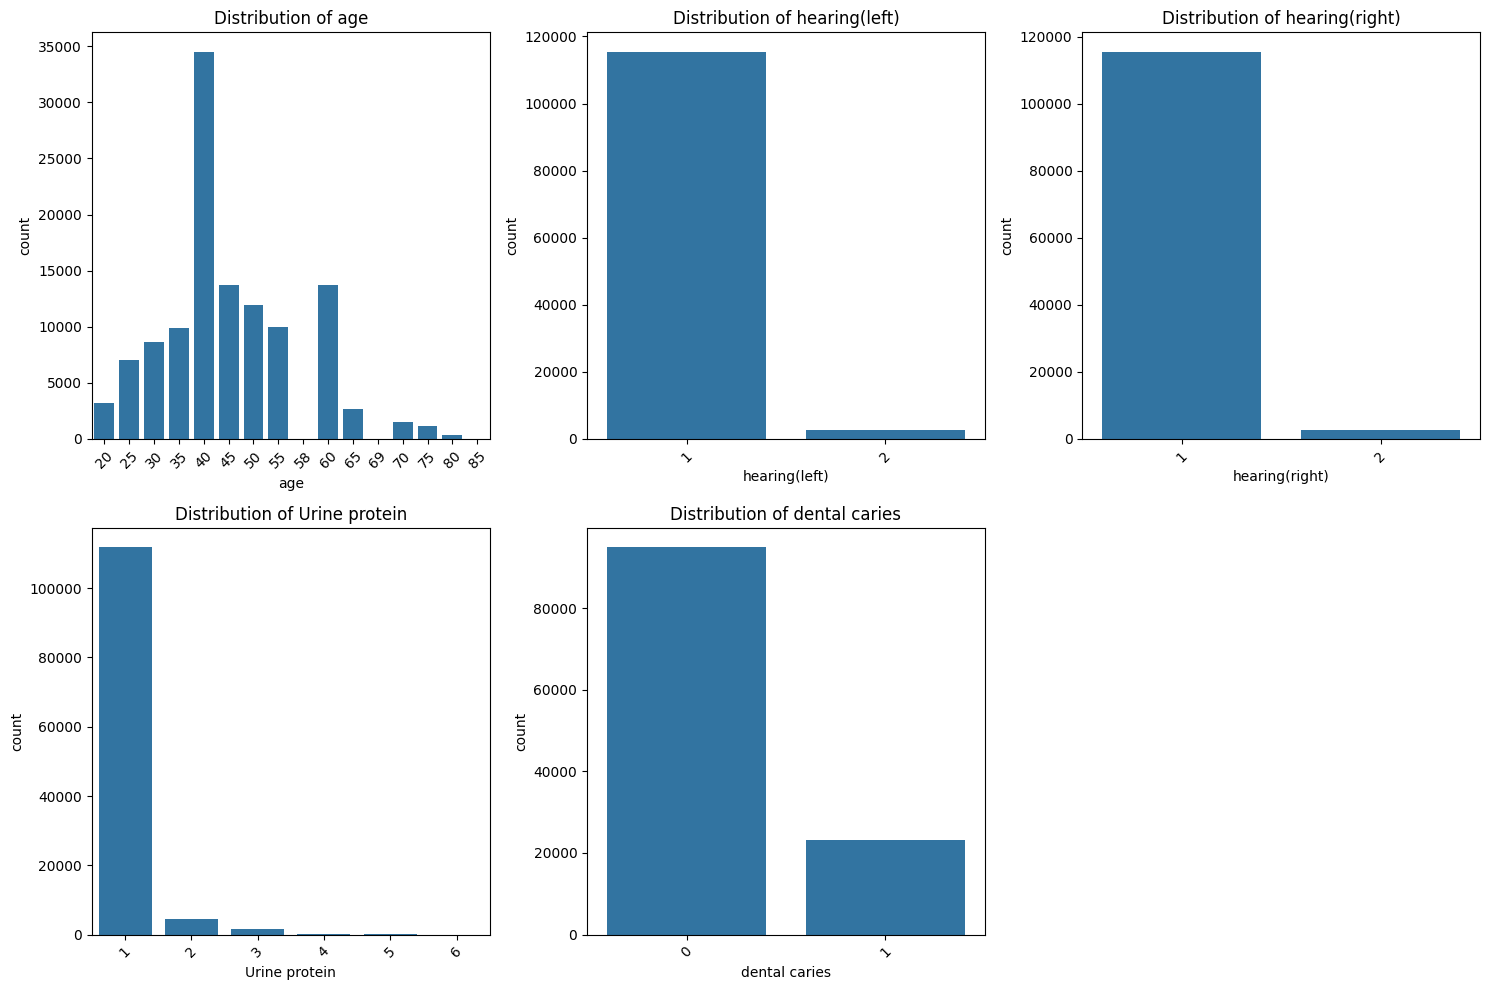

In [97]:
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=X, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate labels if needed for readability
plt.tight_layout()
plt.show()


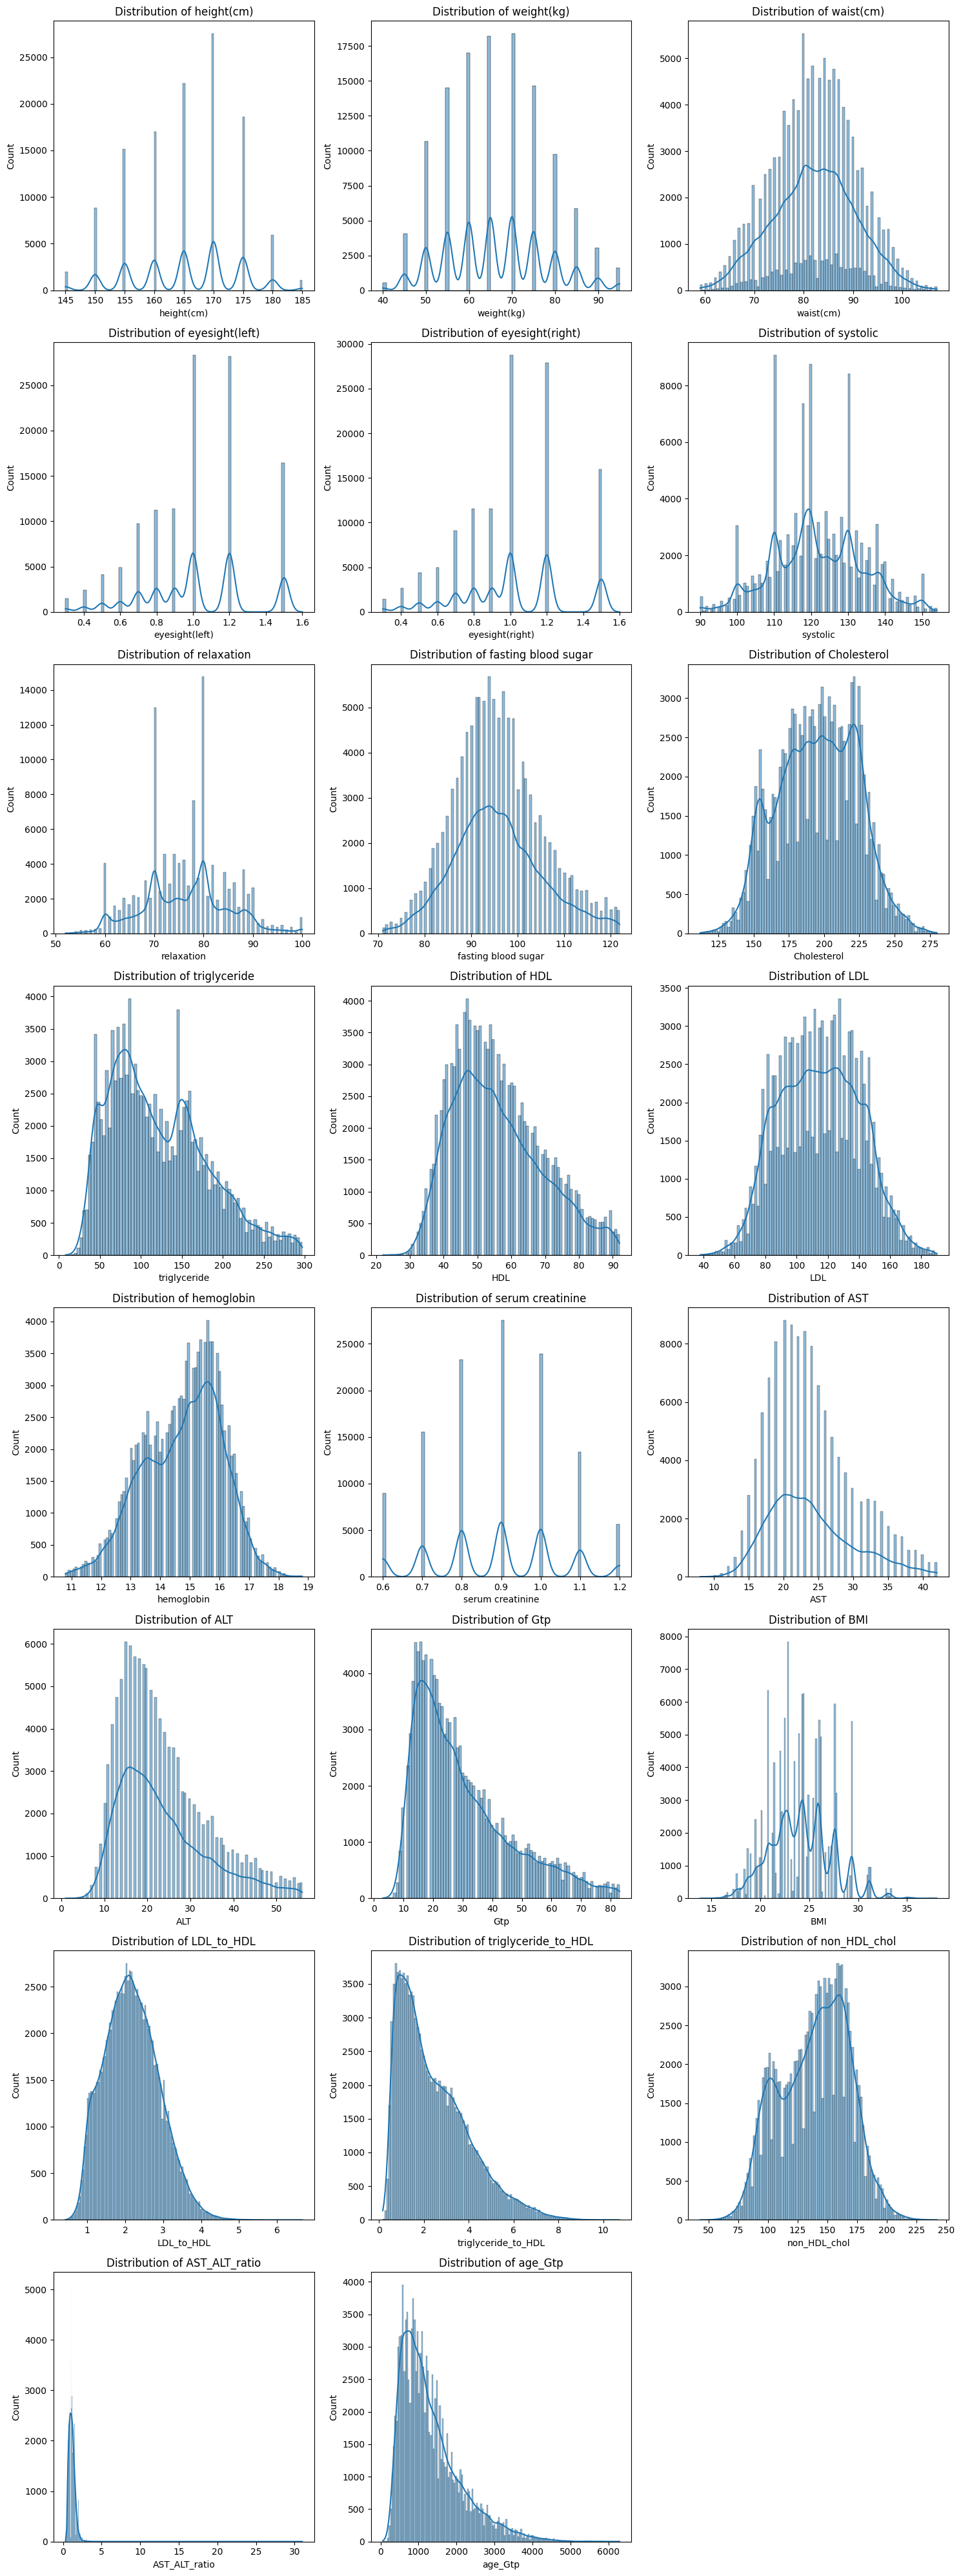

In [86]:
n_cols = 3
n_rows = (len(continuous_features) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=X_cleaned, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

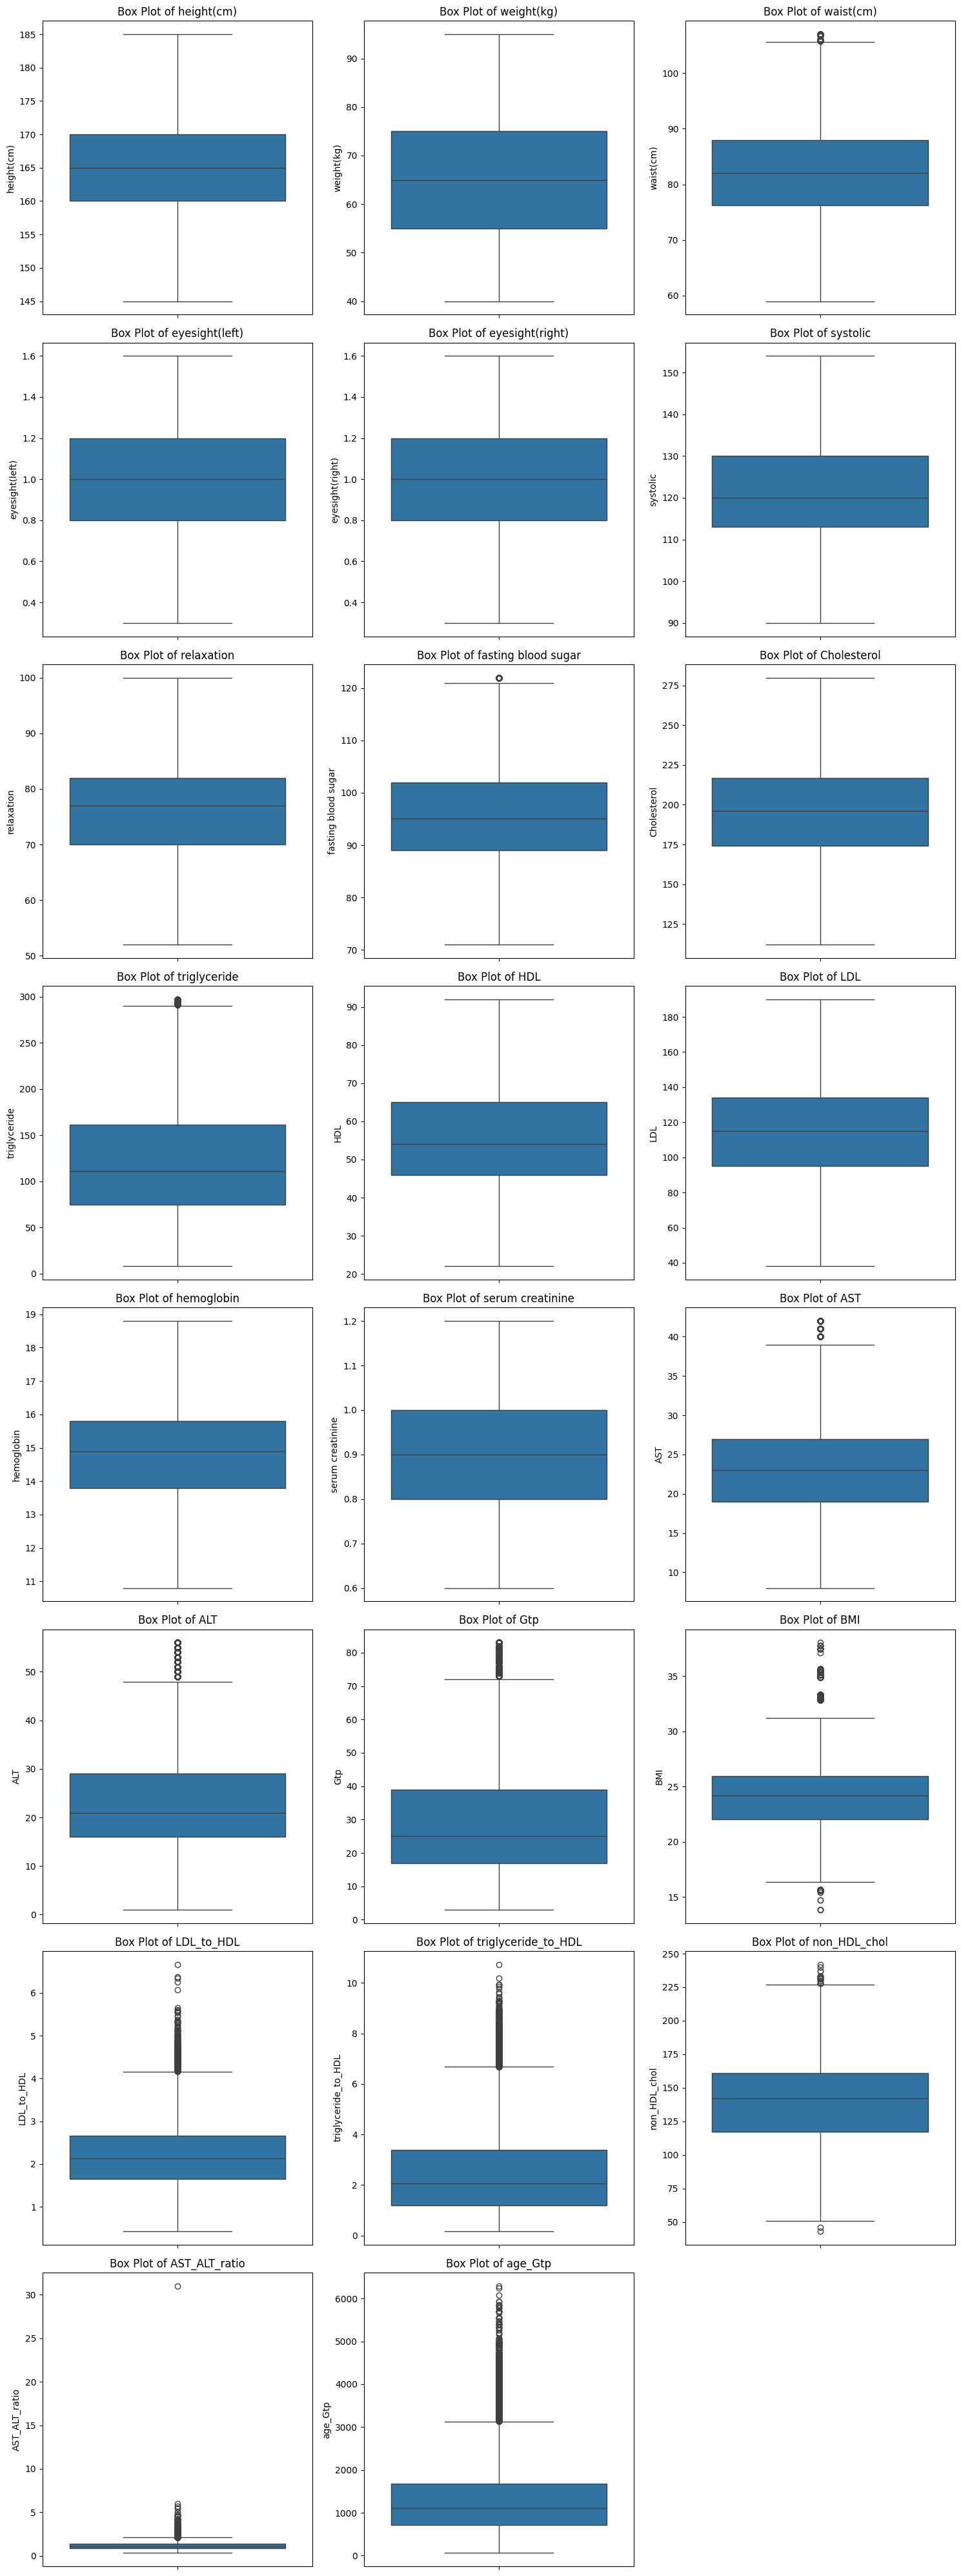

In [87]:
n_cols = 3
n_rows = (len(continuous_features) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=X_cleaned, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [88]:

# Calculate Q1, Q3, and IQR
Q1 = X_cleaned[continuous_features].quantile(0.25)
Q3 = X_cleaned[continuous_features].quantile(0.75)
IQR = Q3 - Q1

# Loop through each feature and replace outliers with the median
for col in continuous_features:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    median = X_cleaned[col].median()
    
    # Replace values below or above bounds with the median
    X_cleaned.loc[X_cleaned[col] < lower_bound, col] = median
    X_cleaned.loc[X_cleaned[col] > upper_bound, col] = median


In [89]:
corr_matrix = X_cleaned.corr()

# Optional: Include the target variable "smoking" in the matrix
# (if "smoking" is not already in X_cleaned)
corr_matrix = pd.concat([X_cleaned, df['smoking']], axis=1).corr()


In [90]:
corr_matrix = pd.concat([X_cleaned, df['smoking']], axis=1).corr()

# Extract only the row (or column) that shows correlation with 'smoking'
smoking_corr = corr_matrix[['smoking']].drop('smoking')  # Drop self-correlation


In [91]:
smoking_corr

,smoking
age,-0.206210
height(cm),0.443912
weight(kg),0.342928
waist(cm),0.243086
eyesight(left),0.133124
eyesight(right),0.145123
hearing(left),-0.036371
hearing(right),-0.036153
systolic,0.047466
relaxation,0.092011


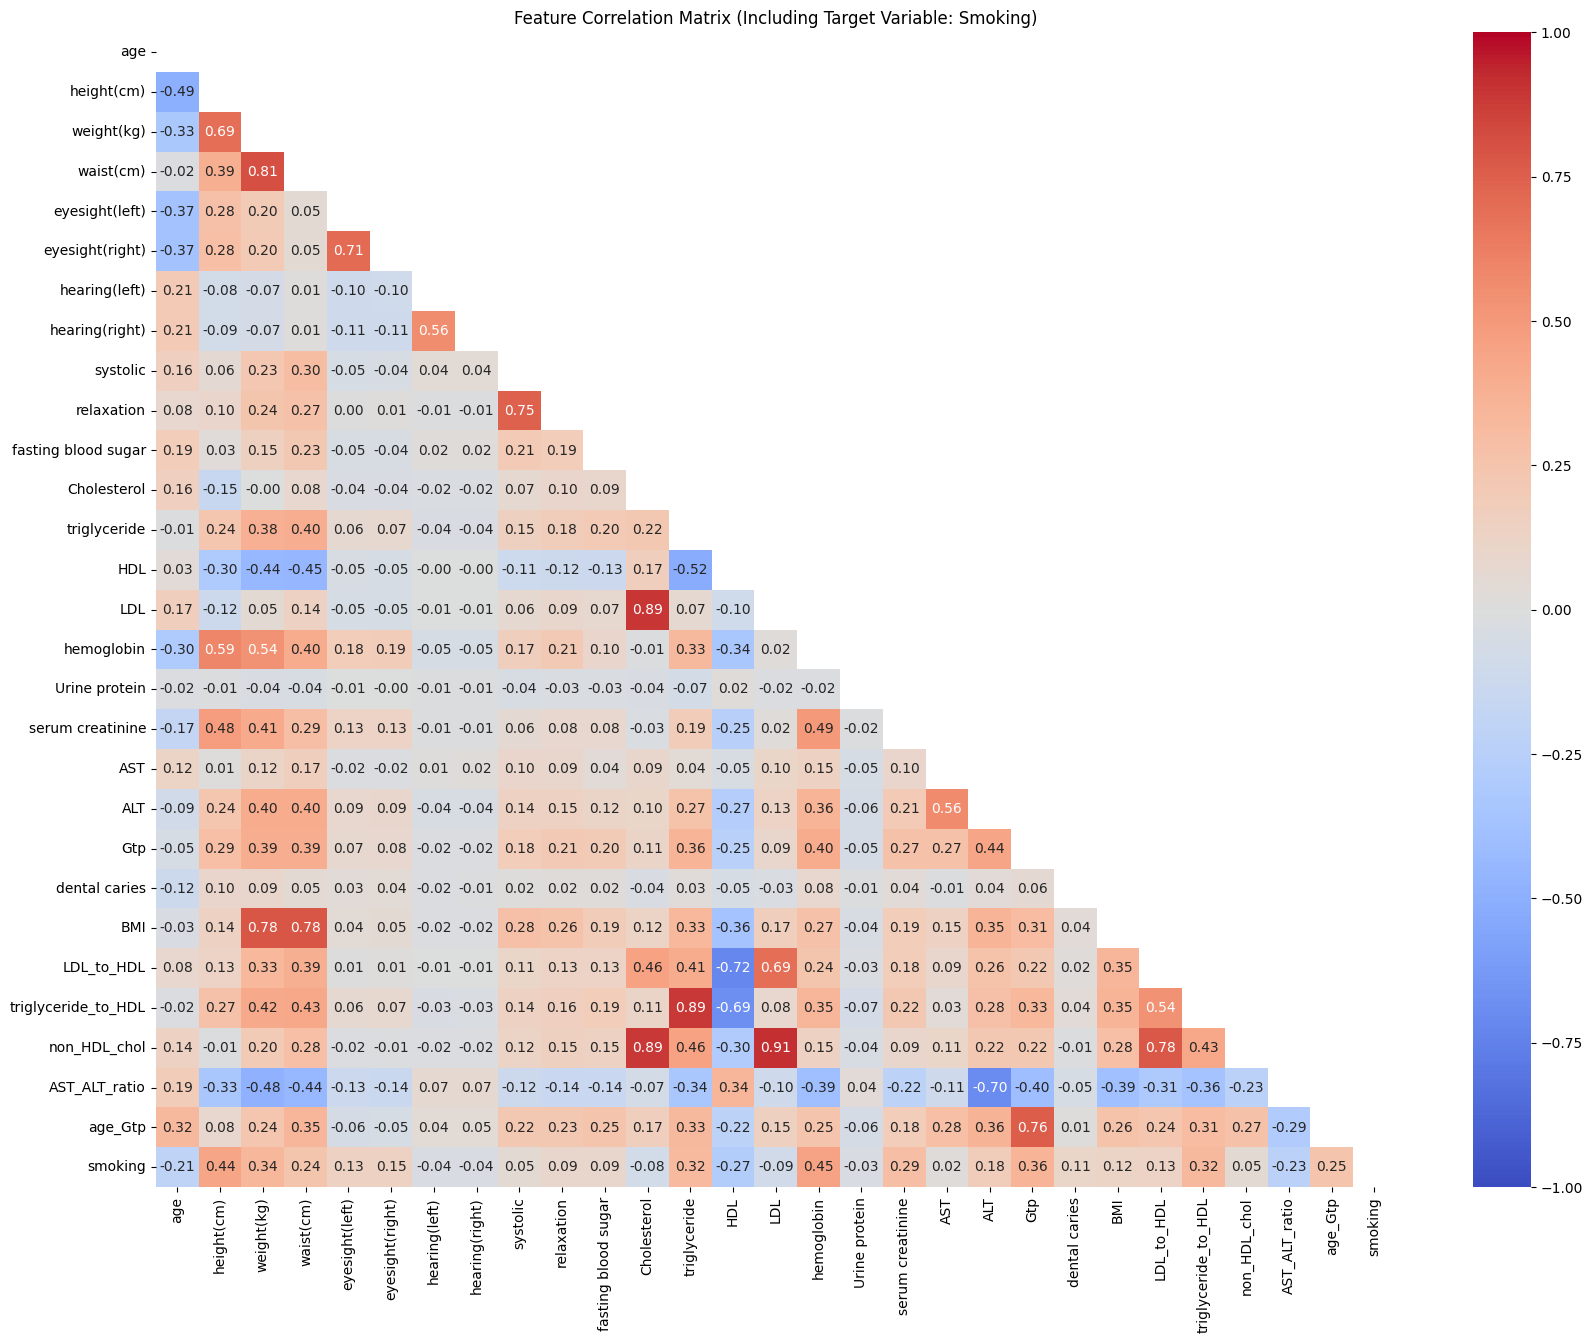

In [92]:
# Combine features with the target
corr_matrix = pd.concat([X_cleaned, df['smoking']], axis=1).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the full heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show the correlation values
    cmap='coolwarm',  # Color gradient
    fmt=".2f",        # Decimal precision
    vmin=-1, vmax=1,  # Correlation range
    mask=mask         # Hide upper triangle
)
plt.title("Feature Correlation Matrix (Including Target Variable: Smoking)")
plt.show()


# Feature selection using Random Forest model

In [94]:
from sklearn.model_selection import train_test_split

X = X_cleaned  # Your cleaned feature data
# Align target 'smoking' with X_cleaned
y = df.loc[X_cleaned.index, 'smoking']
  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [96]:

importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Show top 10
print(feature_importances.head(10))


hemoglobin             0.116811
height(cm)             0.098419
Gtp                    0.065473
triglyceride_to_HDL    0.059294
triglyceride           0.053645
age_Gtp                0.047523
AST_ALT_ratio          0.038073
LDL_to_HDL             0.035498
serum creatinine       0.035042
LDL                    0.034601
dtype: float64


In [98]:
top_features = [
    'hemoglobin', 'height(cm)', 'Gtp', 'triglyceride_to_HDL', 'triglyceride',
    'age_Gtp', 'AST_ALT_ratio', 'LDL_to_HDL', 'serum creatinine', 'LDL'
]

X_top = X_cleaned[top_features]


In [106]:
X_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118258 entries, 2 to 159255
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hemoglobin           118258 non-null  float64
 1   height(cm)           118258 non-null  int64  
 2   Gtp                  118258 non-null  int64  
 3   triglyceride_to_HDL  118258 non-null  float64
 4   triglyceride         118258 non-null  int64  
 5   age_Gtp              118258 non-null  int64  
 6   AST_ALT_ratio        118258 non-null  float64
 7   LDL_to_HDL           118258 non-null  float64
 8   serum creatinine     118258 non-null  float64
 9   LDL                  118258 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 14.0 MB


In [107]:

sample_size = 10000
sample_data = X_top.sample(n=sample_size, random_state=42)

# Check the sampled data
print(sample_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 114001 to 32627
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hemoglobin           10000 non-null  float64
 1   height(cm)           10000 non-null  int64  
 2   Gtp                  10000 non-null  int64  
 3   triglyceride_to_HDL  10000 non-null  float64
 4   triglyceride         10000 non-null  int64  
 5   age_Gtp              10000 non-null  int64  
 6   AST_ALT_ratio        10000 non-null  float64
 7   LDL_to_HDL           10000 non-null  float64
 8   serum creatinine     10000 non-null  float64
 9   LDL                  10000 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 859.4 KB
None


In [108]:
y = df.loc[sample_data.index, 'smoking']

In [110]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(sample_data, y, test_size=0.2, random_state=42)


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Fit and transform the scaler only on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation set using the fitted scaler
X_val_scaled = scaler.transform(X_val)

# Apply PCA on the scaled training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the validation set using the fitted PCA
X_val_pca = pca.transform(X_val_scaled)

# Check how much variance is explained by the selected components
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.37982793 0.17218237]


In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [3, 5]
}

# Create an SVC model
svc = SVC(probability=True)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2  )

# Fit the grid search on the training data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters found during the search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model after hyperparameter tuning
best_svc = grid_search.best_estimator_



Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve


# Make predictions on the validation set
y_pred = best_svc.predict(X_val_pca)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_val, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_val, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_val, y_pred)
print(f"F1 Score: {f1:.2f}")



Accuracy: 73.45%
Precision: 0.63
Recall: 0.80
F1 Score: 0.71


In [125]:
from sklearn.metrics import roc_auc_score

# Assuming 'best_svc' is your trained model and 'X_val_pca' is the PCA-transformed validation data
roc_auc = roc_auc_score(y_val, best_svc.predict_proba(X_val_pca)[:, 1])

print(f"ROC-AUC: {roc_auc:.2f}")


ROC-AUC: 0.81


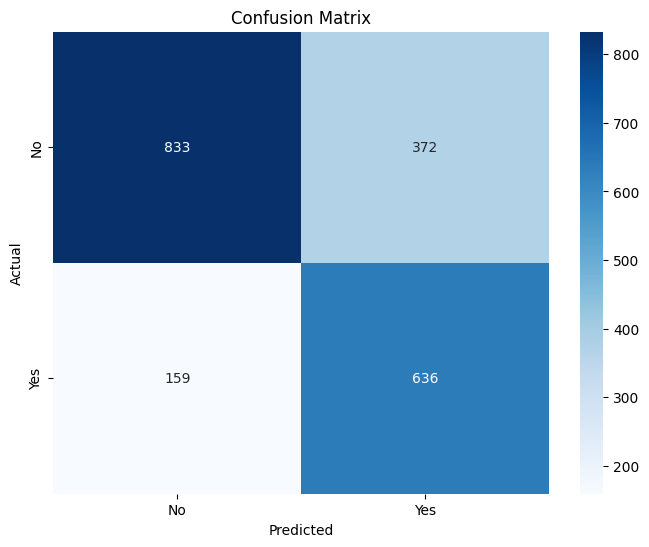

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


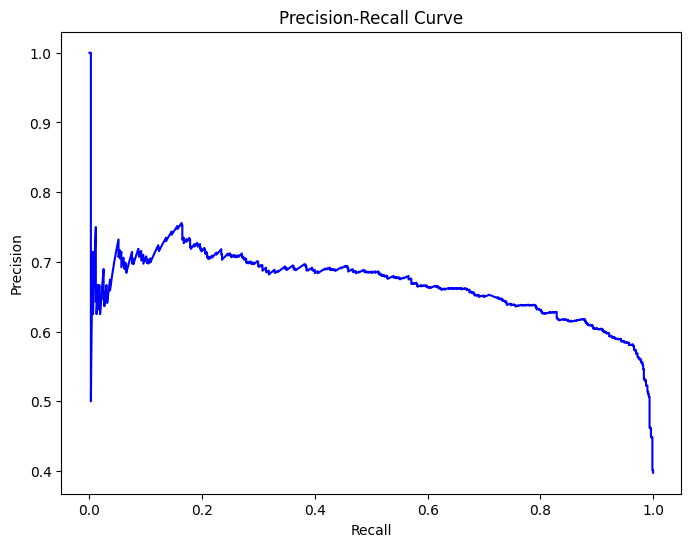

In [127]:
# Get precision, recall, and thresholds for Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_val, best_svc.predict_proba(X_val_pca)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
